In [3]:
#Run this cell

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# VOWEL FORMANT PREDICTIONS

In the first part to this notebook, you were able to explore the dataset, construct a vowel chart, plot relationships between corner vowels, and draw your own vowel space. The first part of the notebook was intended to provide moer visualization and exploration of your data, but now we will move into making predictions based off the same dataset in a more analytical perspective. 


You will explore the relationships between different attributes, predict gender/height from the vowel space, evaulate which predicting methods are the most effective, what improvements you can make to better your predictions, and overall find meaning to the models you are creating.

# 1. Upload your data

Prior to being able to work with the data, you must upload your dataset. As you run the cell, take a look at the code and try to figure out what is happening.  The first two lines of code below are what create the dataframe provided. The remainder of the code(excluding the last line) is used to create and add an extra column to the dataframe, called "IPA", which transforms the vowels from each row to their correspaonding IPA vowel. The last line of code is what returns the timit dataframe, but instead of printing the whole dataset, which could be huge, it only prints the first 5 rows of the dataframe.

In [10]:
#RUN THIS CELL

files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)

#creates and add the "IPA" column 
timit['IPA'] = timit.vowel.map({"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"})

#returns the first 5 rows of your data
timit.head()

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6


In [11]:
timit['IPA'] = timit.vowel.map({"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"})
timit.head()

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0,IPA
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


# 2. Clean Your Data

## 2.1 Drop Columns

Many times we are given datasets with more information than we need. Sometimes the datasets have empty values or columns that can actually make your data messier or harder to interpret. Before jumping into analyzing your data it is important to clean you data. 

In [214]:
#RUN THIS CELL

timit.drop(["speaker", "file", "word"], axis = 1, inplace = True)
timit.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


## <font color = "red"> EXERCISE #1 </font>

For this exercise you are going to drop two more columns we are not going to use for this specific notebook. For this analysis we are focusing on F1 and F2, which means we do not need <b>F0</b> and <b>F3</b>. For your first excercise drop the two columns we do not need in the cell below. If your columns were dropped successfully then you should no longer see them when you run the cell below.

<b>HINT:</b> Replace what is inbetween the square brackets with the names of the columns you want to drop.

In [15]:
#RUN THIS CELL

timit.drop(["NAME_OF_COLUMN1", "NAME_OF_COLUMN2"], axis = 1, inplace = True)
timit.head()

,gender,t,vowel,stress,duration,f1,f2,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,u


## 2.2 Splitting/Subsetting the Data

There are many different ways to split your data to better analyze it in a more organized manner. Below I have provided a couple options for you to chose from in which you could split your data. Such as gender, vowels, etc. When it comes to analyzing your own data this option is optional to what you think would be the most effective.

### a. By Gender

Using the same dataframe we created above, called <i>timit</i>, we are going to subset another dataframe. The first split will be by gender. To acknowledge all the types of genders listed under the gender column you can use the function provided below. If you run the cell below you could see that for this specific dataset there are only "female" and "male" unique values under gender. Given that information, you can create two subsets dataframes based off of gender. 

In [1]:
#RUN THIS CELL 
timit.gender.unique()

NameError: name 'timit' is not defined

The first subset dataframe you create will be called <b>fem_data</b> and that includes all the data for those that identify as "female". You will create another subset dataframe, but this one will be called <b>male_data</b>. This includes all the data for those who identify as "male". Creating these subset dataframes does not affect the original <i>timit</i> dataframe.

In [216]:
fem_data = timit[timit.gender == "female"]
fem_data.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
0,female,0.3225,IY,1,0.08,486.2,2467.9,3185.1,244.9,i
1,female,0.5025,AE,1,0.10,595.1,2067.0,2976.7,241.6,æ
2,female,0.6825,UH,1,0.04,468.7,1956.1,3061.4,201.9,ʊ
3,female,0.8525,AA,1,0.10,740.4,1674.1,2767.3,221.5,ɑ
4,female,1.1975,UW,1,0.17,464.0,1698.0,2904.9,232.6,u


In [217]:
male_data = timit[timit.gender == "male"]
male_data.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
1761,male,0.2775,IY,1,0.07,473.1,2134.7,2778.2,75.2,i
1762,male,0.4225,AE,1,0.08,453.0,1959.1,2613.8,158.8,æ
1763,male,0.5575,UH,1,0.03,356.3,1890.3,2723.1,164.4,ʊ
1764,male,0.7025,AA,1,0.10,684.3,1291.6,2288.3,70.9,ɑ
1765,male,1.1925,UW,1,0.18,418.7,1329.3,2439.9,140.7,u


### b. By Vowels

You could pick specific vowels to create a subset for using the <i>timit</i> dataframe. For the example provided below, we used the "aʊ" vowel, but you could subset on a vowel of your choice.

In [218]:
aw = timit[timit.IPA == "aʊ"]
aw.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
81,female,0.2775,AW,1,0.07,710.2,1322.1,2672.0,248.5,aʊ
93,female,0.7775,AW,1,0.15,781.2,1340.9,2884.3,197.0,aʊ
229,female,0.8275,AW,1,0.17,772.8,1412.4,2467.0,209.8,aʊ
231,female,1.0675,AW,1,0.19,847.9,1530.6,2543.6,196.0,aʊ
304,female,2.1325,AW,1,0.16,726.8,1469.4,2456.5,185.0,aʊ


You could also subset the <b>fem_data</b> and <b>male_data</b> dataframes you created and subset again on specific vowels. For the examples provided below, we also used the "aʊ" IPA vowel to subset.

In [219]:
aw_fem = fem_data[fem_data.IPA == "aʊ"]
aw_fem.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
81,female,0.2775,AW,1,0.07,710.2,1322.1,2672.0,248.5,aʊ
93,female,0.7775,AW,1,0.15,781.2,1340.9,2884.3,197.0,aʊ
229,female,0.8275,AW,1,0.17,772.8,1412.4,2467.0,209.8,aʊ
231,female,1.0675,AW,1,0.19,847.9,1530.6,2543.6,196.0,aʊ
304,female,2.1325,AW,1,0.16,726.8,1469.4,2456.5,185.0,aʊ


In [220]:
aw_male = male_data[male_data.IPA == "aʊ"]
aw_male.head()

,gender,t,vowel,stress,duration,f1,f2,f3,f0,IPA
1825,male,1.6925,AW,1,0.14,669.3,1223.7,2896.8,133.1,aʊ
1967,male,1.0575,AW,1,0.11,684.4,1270.4,2443.1,106.1,aʊ
1971,male,1.7425,AW,1,0.14,624.3,1158.4,2374.1,96.7,aʊ
2296,male,1.7075,AW,1,0.11,547.0,1103.4,2234.7,123.7,aʊ
2388,male,0.3925,AW,1,0.04,520.4,1016.2,2630.9,175.8,aʊ


## <font color = "red"> EXERCISE #2 </font>

All of section 2.2 was based on subsetting dataframes. Using the examples provided above as resources, create a subset dataframe on the vowel of your choice. You can either use the <b>timit</b> dataframe to subset from or the <b>fem_data/male_data</b> to subset from. This vowel subset does not have to be used for your analysis, but it does serve as good practice. 

<b>HINT:</b> Replace everything that is capitalized according to your vowel and dataframe choice. The only capitalized section you don't need to change in the <b>".IPA"</b> portion.

In [ ]:
YOUR_SUBSET = DATAFRAME_NAME[DATAFRAME_NAME.IPA == "IPA_VOWEL"]
YOUR_SUBSET.head()

# 3. Exploring the Descriptive Data

To start off visualizing our data we have provided a bar chart showing the percentage of each vowel per gender. For this first visualization just counting the occurences of each vowel would not have worked because there were more male subjects as opposed to female subjects which could have affected the data. Instead for this bar chart we used percentage.

## 3.1 Vowels Most Used by Gender

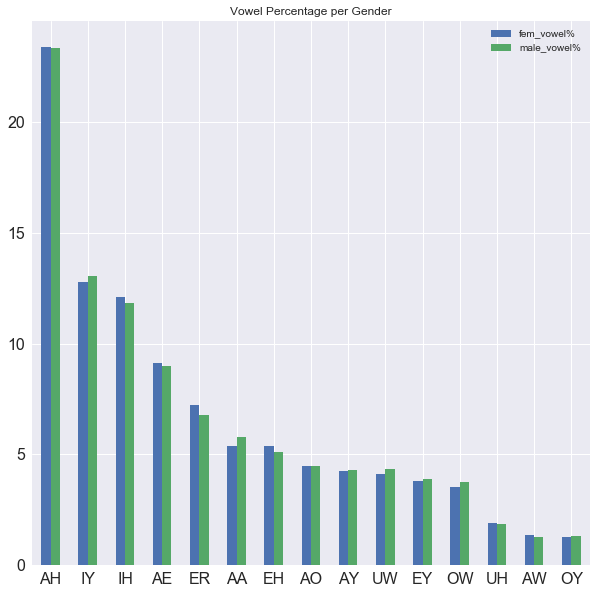

In [302]:
vowel_perc = (100 * fem_data.vowel.value_counts() / len(fem_data)).to_frame(name = "fem_vowel%")
vowel_perc["male_vowel%"] = (100 * male_data.vowel.value_counts()/len(male_data))
vowel_perc.plot(kind = "bar", figsize =(10,10), title = "Vowel Percentage per Gender", fontsize = 16, rot = 0);

## <font color = "blue"> QUESTION #1 </font>

After analyzing the results from the bar chart, would you agree that the results coincide with what you had anticipated? Were the vowels for which women or men used more often something you had already predicted? Why do you think women scored higher in the "IY" vowel, but lower on the "IH" vowel? Explain your thoughts with the results from the first visualization.

~ ANSWER HERE ~

## 3.2 Understanding Vowel Formants

" The frequency of the first formant <b>(F1)</b> is mostly determined by the height of the tongue body:<br>

<ul>high F1 = <i>low</i> vowel (i.e., high frequency F1 = low tongue body)<br>
low F1 = <i>high</i> vowel (i.e., low frequency F1 = high tongue body)</ul>


The frequency of the second formant <b>(F2)</b> is mostly determined by the frontness/backness of the tongue body:
<br><ul>
high F2 = <i>front</i> vowel<br>
low F2 = <i>back</i> vowel "</ul>

LINK : https://home.cc.umanitoba.ca/~krussll/phonetics/acoustic/formants.html

Below we grouped the data by each vowel and then found the mean of all its values. For the first cell below, we just printed it's results from F1 and put it in descending order. For the second cell we did very similar code, but instead focusing on F2.

Look at the brief definitions of F1 and F2 provided above this cell. Do you notice any trends in regards to the vowels that appeared most in specific genders and their characteristics of being high/low or front/back vowels? Are there any relationships?

In [293]:
F1 = timit.groupby("IPA").mean().f1.sort_values(ascending = False)
F1

IPA
aʊ    715.092608
ɑ     702.291314
aɪ    681.465885
æ     652.258700
ɔ     634.867838
ɛ     588.080265
ɔɪ    575.986430
oʊ    553.662717
ʌ     519.944476
ɝ     514.742700
eɪ    491.265252
ɪ     486.798266
ʊ     449.893593
i     427.340202
u     422.325870
Name: f1, dtype: float64

In [294]:
F2 = timit.groupby("IPA").mean().f2.sort_values(ascending = False)
F2

IPA
i     2043.482354
eɪ    2032.372756
ɪ     1843.402023
æ     1761.430284
ɛ     1669.534859
aɪ    1617.320331
ʊ     1589.082730
u     1556.944049
ʌ     1522.298740
ɝ     1432.745745
aʊ    1347.778226
ɑ     1273.200030
ɔɪ    1261.274572
oʊ    1155.284637
ɔ     1095.295097
Name: f2, dtype: float64

## 3.3 Is there a linear relationship?

Below, we have plotted the vowels in accordance to the mean of their F2/F1. The simplest statistical test we can perform on our data is the linear regression test. From the cell provided below do you think the vowels could be categorized as having a linear relationship?

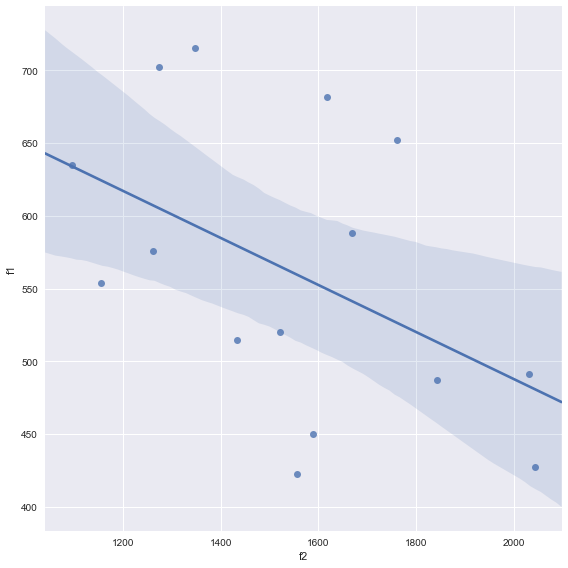

In [309]:
vow_mean = timit.groupby("vowel").mean()
sns.lmplot(x = 'f2', y = 'f1', data = vow_mean, size = 8);

## <font color = "blue"> QUESTION #2 </font>

<img src ="https://www.happyhourspanish.com/wp-content/uploads/2016/08/IPA-chart-vowels-768x576.png" width="50%" height="50%" >

If the linear relationship was not the best fit, what regression model do you think fits the vowel space the most? Above this cell there is a IPA vowel chart to serve as a visual representation of where the vowels are placed in comparison to your model?


~ ANSWER HERE ~

# 4. More Data Visualizations

## 4.1  Comparing F2 VS F1 color coded by gender

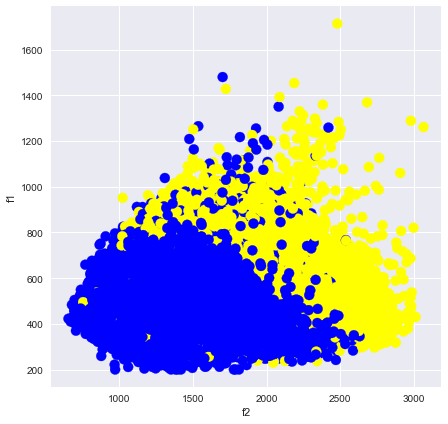

In [136]:
timit.plot(kind = 'scatter', x = 'f2', y = 'f1', c = timit.gender.map({"female": 'yellow', "male": 'blue'}), s = 100, figsize = (7, 7))

As you can see with the cell above, there is some distinction with F2 and F1 based off of gender. The higher the F2, the higher the probability of it being a female. A higher F2 means that it is a front vowel.


Due to the fact that there are so many data points, this scatter plot is not the best visual representation to use. Below I have included density maps which show the same type of information as the plot above, but instead of resembling blobs, the more dense the area the darker the shade. This is a way of representing your data in an easier way to interpret for others who are unfamiliar with the analysis.

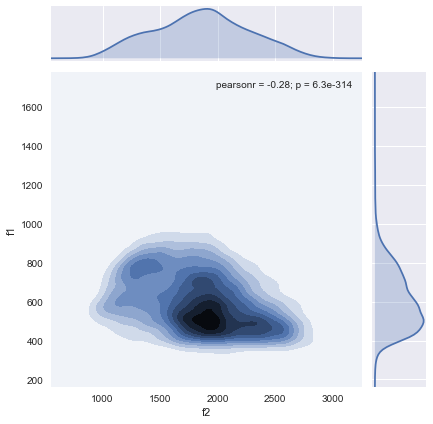

In [190]:
sns.jointplot("f2", "f1", data=fem_data, kind='kde')

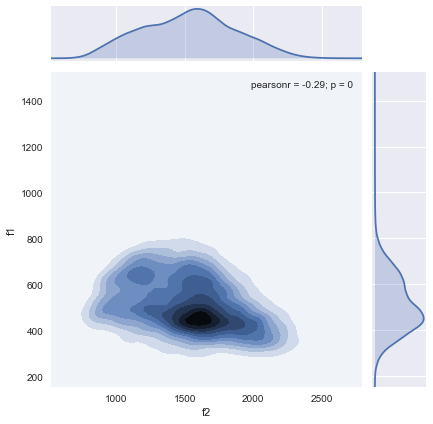

In [187]:
sns.jointplot("f2", "f1", data=male_data, kind='kde')

## <font color = "green"> BONUS QUESTION:

What other techniques and improvements would you make to further the predictions to today's analysis? Try some in the cell below.

In [338]:
#TRY HERE